# Sales Prediction

## Import Library

In [180]:
# Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import layers, models, optimizers

In [181]:
# for clean output
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

## Load Data

In [182]:
df_train = pd.read_csv('in/sales_train.csv')
df_test = pd.read_csv('in/test.csv')

## Exploratory Analysis

In [183]:
def dataset_resume(data_set):
  
    parameters = {
        'Overview': data_set.head(5),
        'Shape' : data_set.shape,
        'Type of data' : data_set.dtypes,
        'Null Values' : data_set.isnull().sum()

    }
    print("="*20, 'Review', "="*20)
    for name, func in parameters.items():
        print('-'*20,name,'-'*20)
        print(func)
        


In [184]:
dataset_resume(df_train)

==================== Review ====================
-------------------- Overview --------------------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
-------------------- Shape --------------------
(2935849, 6)
-------------------- Type of data --------------------
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
-------------------- Null Values --------------------
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day    

In [185]:
dataset_resume(df_test)

==================== Review ====================
-------------------- Overview --------------------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
-------------------- Shape --------------------
(214200, 3)
-------------------- Type of data --------------------
ID         int64
shop_id    int64
item_id    int64
dtype: object
-------------------- Null Values --------------------
ID         0
shop_id    0
item_id    0
dtype: int64


Del df_train la columna 'Date' pasarlo a Datetime

In [186]:
df_train['date'] = pd.to_datetime(df_train['date'],format="%d.%m.%Y")


In [187]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [188]:
def heat_map(data):
    df_corr = data.corr()
    sns.heatmap(df_corr,annot=True)
    return plt.show()

In [189]:
item_price = df_train['item_price']
item_cnt_day = df_train['item_cnt_day']

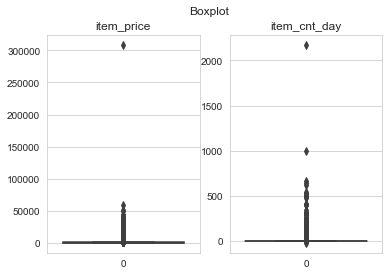

In [190]:
fig, axes = plt.subplots(1,2)
fig.suptitle('Boxplot')
axes[0].set_title('item_price')
axes[1].set_title('item_cnt_day')
sns.boxplot(ax = axes[0], data=item_price)
sns.boxplot(ax = axes[1], data=item_cnt_day)
plt.show()

## Outliers

In [191]:
q1_item_price = item_price.quantile(0.25)
q3_item_price = item_price.quantile(0.75)
iqr_item_price = q3_item_price -q1_item_price
upper_item_price = q3_item_price + 1.5*iqr_item_price
low_item_price = q3_item_price - 1.5*iqr_item_price

q1_item_cnt_day = item_cnt_day.quantile(0.25)
q3_item_cnt_day = item_cnt_day.quantile(0.75)
iqr_item_cnt_day = q3_item_cnt_day -q1_item_cnt_day
upper_item_cnt_day = q3_item_cnt_day + 1.5*iqr_item_cnt_day
low_item_cnt_day = q3_item_cnt_day - 1.5*iqr_item_cnt_day

In [192]:
df_train = df_train[df_train['item_price']<= upper_item_price]
df_train = df_train[df_train['item_price'] >= low_item_price]
df_train = df_train[df_train['item_cnt_day']<= upper_item_cnt_day]
df_train = df_train[df_train['item_cnt_day'] >= upper_item_cnt_day]

In [193]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2412619.0,14.273260,9.435639,0.0,6.0,13.0,22.0,33.0
shop_id,2412619.0,33.125314,16.285022,0.0,22.0,31.0,48.0,59.0
item_id,2412619.0,10513.148920,6287.310916,0.0,4810.0,10270.0,16020.0,22168.0
item_price,2412619.0,560.390357,468.973452,-1.0,200.0,399.0,779.0,2124.0
item_cnt_day,2412619.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [194]:
df_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


## Copy

In [198]:
train_data = df_train[['item_price','item_cnt_day']].copy()


In [199]:
train_data = train_data['item_price']*train_data['item_cnt_day']
train_data

0           999.00
1           899.00
3          1709.05
4          1099.00
5           349.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Length: 2412619, dtype: float64

## Normalizando

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean)/std
train_data

